# plot ma at eu and us


In [1]:
%cd '/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection'

import pandas as pd
import matplotlib.pyplot as plt

/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection


In [2]:
# Read in the data
df_ema = pd.read_csv("02_AllThingsData/MA-EU_Based/Data/EMA_MA_Drugs_For_Plotting.csv")

df_fda = pd.read_csv("02_AllThingsData/MA-US-Based/Data/US_MA_Drugs_For_Plotting.csv")


# remove all drugs prior to 1983
df_ema = df_ema[df_ema["BirthYear"] > 1983]
df_fda = df_fda[df_fda["BirthYear"] > 1983]


# print shapes
print(f"The shape of the EMA data is: {df_ema.shape}")
print(f"The shape of the FDA data is: {df_fda.shape}")

# nr of drugs they have in common
print(
    f'The number of drugs they have in common is: {len(set(df_ema["DrugName"]).intersection(set(df_fda["DrugName"])))}'
)


# all drugs
all_drugs = set(df_ema["DrugName"].to_list() + df_fda["DrugName"].to_list())
print(f"The number of drugs in total is: {len(all_drugs)}")

The shape of the EMA data is: (14, 5)
The shape of the FDA data is: (27, 5)
The number of drugs they have in common is: 10
The number of drugs in total is: 31


In [3]:
def create_intersection_df(df_ema_, df_fda_):
    df_ema_.columns = [col + "_EMA" for col in df_ema_.columns]
    df_fda_.columns = [col + "_FDA" for col in df_fda_.columns]

    df_intersection = pd.merge(
        df_ema_, df_fda_, left_on="DrugName_EMA", right_on="DrugName_FDA", how="inner"
    )

    return df_intersection


df_intersection = create_intersection_df(df_ema, df_fda)

In [4]:
print(f"Drugs in intersection: {df_intersection['DrugName_EMA']}")

Drugs in intersection: 0       bupropion
1      fluoxetine
2      citalopram
3      paroxetine
4      sertraline
5     venlafaxine
6     mirtazapine
7    escitalopram
8      duloxetine
9    vortioxetine
Name: DrugName_EMA, dtype: object


In [5]:
import sys

sys.path.append("02_AllThingsData/Utils/Plotting")

from MA_TimelinePlot import BirthYearTimelinePlotter_Intersection

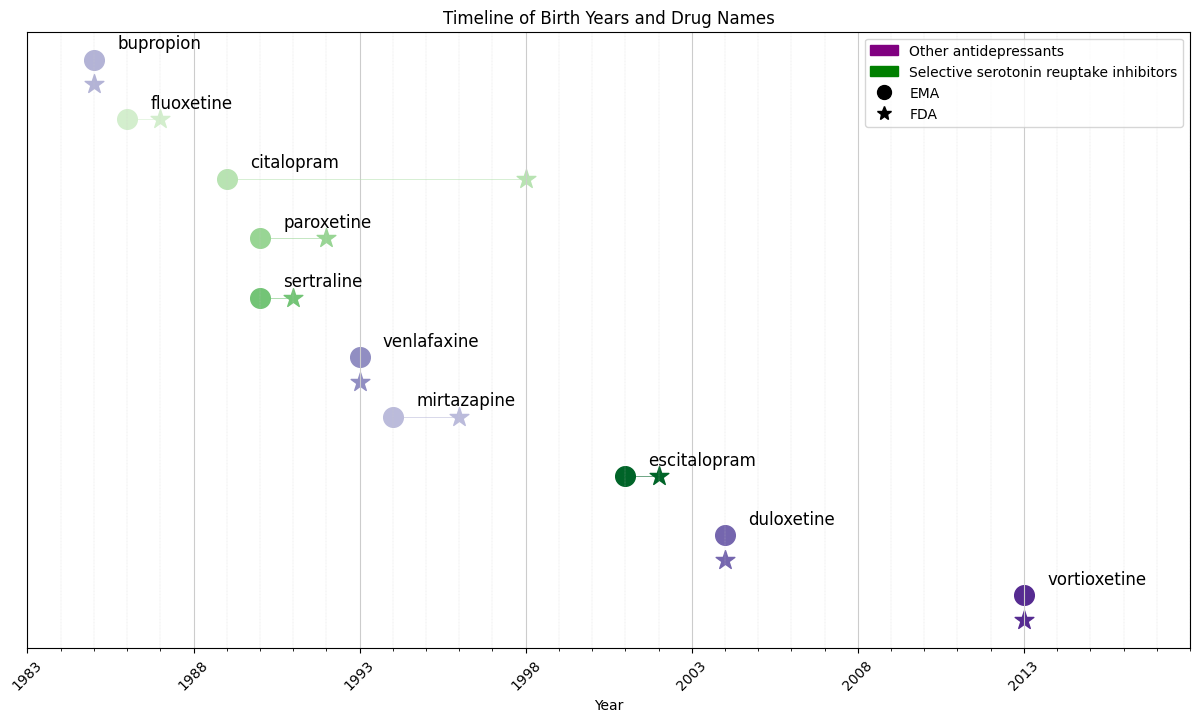

In [6]:
eufda_plotter = BirthYearTimelinePlotter_Intersection(df_intersection, style=1)
eufda_plotter.plot_birth_year_timeline(
    save_path="02_AllThingsData/Combined/imgs/CombinedApprovalPlot.png",
    show_note=False,
    note_text=None,
)

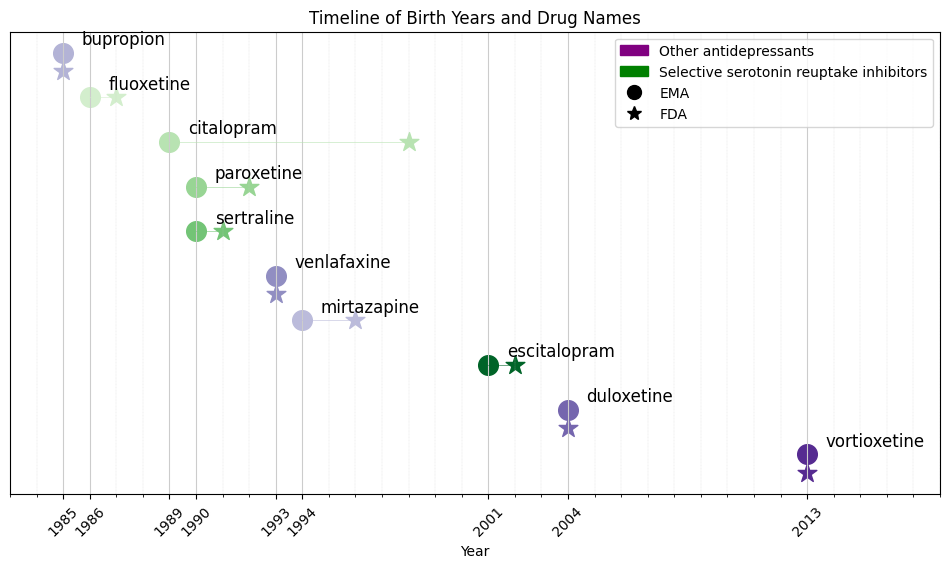

In [7]:
eufda_plotter = BirthYearTimelinePlotter_Intersection(df_intersection, style=2)
eufda_plotter.plot_birth_year_timeline(
    save_path="02_AllThingsData/Combined/imgs/CombinedApprovalPlot.png",
    figsize=(12, 6),
    show_note=False,
    note_text=None,
)